In [11]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from tqdm import tqdm
tqdm.pandas()
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df1=pd.read_pickle('processed_DI_data.pkl')

In [12]:
df_lyft= df1[df1['word_check']=='lyft']
df_lyft['count']=[1 for i in range(len(df_lyft))]
df_lyft['cum_count']=df_lyft['count'].cumsum()
df_lyft['senti_score']=df_lyft.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_lyft['cum_senti_score']=df_lyft['senti_score'].cumsum()

df_uber= df1[df1['word_check']=='uber']
df_uber['count']=[1 for i in range(len(df_uber))]
df_uber['cum_count']=df_uber['count'].cumsum()
df_uber['senti_score']=df_uber.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_uber['cum_senti_score']=df_uber['senti_score'].cumsum()

df_taxi= df1[df1['word_check']=='taxi']
df_taxi['count']=[1 for i in range(len(df_taxi))]
df_taxi['cum_count']=df_taxi['count'].cumsum()
df_taxi['senti_score']=df_taxi.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_taxi['cum_senti_score']=df_taxi['senti_score'].cumsum()

100%|██████████████████████████████████████████████████████████████████████████████| 345/345 [00:00<00:00, 3510.08it/s]


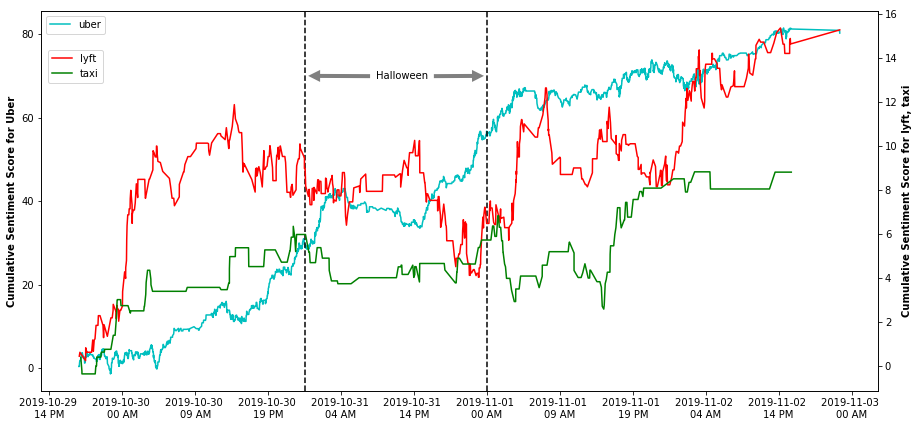

In [14]:
fig,ax=plt.subplots(figsize=(15,7))
ax2=ax.twinx()
ax.plot(df_uber['time'],df_uber['cum_senti_score'],color='c',label='uber')
ax2.plot(df_lyft['time'],df_lyft['cum_senti_score'],color='red',label='lyft')
ax2.plot(df_taxi['time'],df_taxi['cum_senti_score'],color='green',label='taxi')
ax.set_ylabel('Cumulative Sentiment Score for Uber', weight='bold')
ax.axvline(x=datetime(2019,10,31),color='k',ls='--')
ax.axvline(x=datetime(2019,11,1),color='k',ls='--')
ax.annotate('Halloween',(datetime(2019,10,31),70),
             xytext=(0.4, 0.82), textcoords='axes fraction',
             arrowprops = dict(facecolor='grey',color='grey',lw=10**(-1000000000000000),shrink=.05))
ax.annotate(' ',(datetime(2019,11,1),70),
             xytext=(0.46, 0.82), textcoords='axes fraction',
             arrowprops = dict(facecolor='grey',color='grey',lw=10**(-1000000000000000),shrink=.05))
ax.xaxis.set_major_locator(mticker.MaxNLocator(15)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d \n%H %p'))
ax2.set_ylabel('Cumulative Sentiment Score for lyft, taxi', weight='bold')
ax.legend()
ax2.legend(bbox_to_anchor=[0,.61,.08,.3])
plt.show()